In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Examine one of the files

In [2]:
file = 'data/Recording Set 2024.01.29-10.33.04.CSV'

In [3]:
# Read experiment data
df = pd.read_csv(file, skiprows=[0,1]) # read, skip info rows

# Convert to datetime
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Inspect data
df.head()

,Time Stamp,PC Capman Pressure,PC Source 2 Freq,PC Source 2 Q,PC Source 2 Rate,PC Source 4 Freq,PC Source 4 Q,PC Source 4 Rate,PC Source 6 Freq,PC Source 6 Q,PC Source 6 Rate,Power Supply 1 Power,Power Supply 1 Voltage,Power Supply 3 Power,Power Supply 3 Voltage,Power Supply 5 DC Bias,Power Supply 5 Fwd Power,PC High Vac Valve Position,PC MFC 1 Flow
0,2024-01-29 10:33:04.240,19.996948,5.983075e+06,96.615039,0.000194,5.986816e+06,97.363152,0.000324,5.982953e+06,96.590667,-0.000314,60.53446,210.424362,19.458659,264.849548,68,50,15,18.389105
1,2024-01-29 10:33:04.347,19.996948,5.983075e+06,96.615039,0.000194,5.986816e+06,97.363152,0.000324,5.982953e+06,96.590667,-0.000314,60.53446,210.424362,19.458659,264.849548,68,50,15,18.389105
2,2024-01-29 10:33:04.461,19.996948,5.983075e+06,96.615039,0.000194,5.986816e+06,97.363152,0.000324,5.982953e+06,96.590667,-0.000314,60.53446,210.424362,19.458659,264.849548,68,50,15,18.389105
3,2024-01-29 10:33:04.573,19.996948,5.983075e+06,96.615039,0.000194,5.986816e+06,97.363152,0.000324,5.982953e+06,96.590667,-0.000314,60.53446,210.424362,19.458659,264.849548,68,50,15,18.469703
4,2024-01-29 10:33:04.682,19.996948,5.983075e+06,96.615039,0.000194,5.986816e+06,97.363152,0.000324,5.982953e+06,96.590667,-0.000314,60.53446,210.424362,19.458659,264.849548,68,50,15,18.469703


In [4]:
# Check size
rows = len(df.axes[0])
cols = len(df.axes[1])

print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 189
Number of columns: 19


# Data processing

In [5]:
# Save date
date = df['Time Stamp'].iloc[0].date().strftime('%m/%d/%Y')
print(f'Stored date: {date}')

# Convert datetime to seconds starting from zero
df['Time Stamp'] = (df['Time Stamp'] - df['Time Stamp'].iloc[0]).dt.total_seconds()

# Round values to three decimals
df = df.round(3)

df.tail()

Stored date: 01/29/2024


,Time Stamp,PC Capman Pressure,PC Source 2 Freq,PC Source 2 Q,PC Source 2 Rate,PC Source 4 Freq,PC Source 4 Q,PC Source 4 Rate,PC Source 6 Freq,PC Source 6 Q,PC Source 6 Rate,Power Supply 1 Power,Power Supply 1 Voltage,Power Supply 3 Power,Power Supply 3 Voltage,Power Supply 5 DC Bias,Power Supply 5 Fwd Power,PC High Vac Valve Position,PC MFC 1 Flow
184,19.875,20.003,5983074.935,96.615,0.0,5986815.187,97.363,0.0,5982953.299,96.591,-0.0,9.096,180.880,19.481,263.746,66,50,15,18.461
185,19.984,20.003,5983074.935,96.615,0.0,5986815.187,97.363,0.0,5982953.299,96.591,-0.0,9.096,180.880,19.481,263.746,66,50,15,18.461
186,20.092,19.998,5983074.935,96.615,0.0,5986815.187,97.363,0.0,5982953.299,96.591,-0.0,9.096,180.880,19.481,263.746,66,50,15,18.372
187,20.193,19.998,5983074.935,96.615,0.0,5986815.187,97.363,0.0,5982953.299,96.591,-0.0,9.096,180.880,19.481,263.746,66,50,15,18.372
188,20.309,19.998,5983074.935,96.615,0.0,5986815.187,97.363,0.0,5982953.299,96.591,-0.0,9.435,181.309,19.429,263.041,66,50,15,18.342


# Rudimentary data analysis

In [6]:
p1 = 'Power Supply 1 Voltage'
p2 = 'Power Supply 3 Voltage'
p3 = 'Power Supply 5 DC Bias'

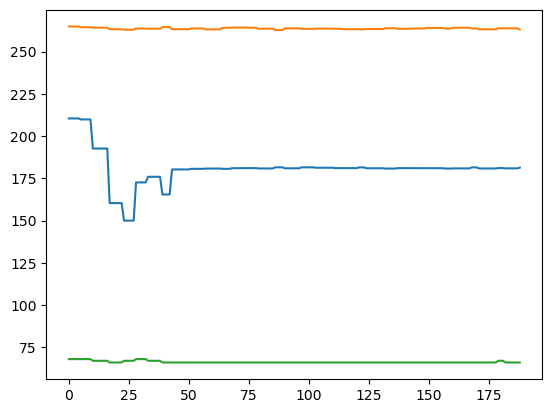

In [7]:
# Plot voltages
xs = df.index

ys1 = df[p1]
ys2 = df[p2]
ys3 = df[p3]

plt.plot(xs,ys1)
plt.plot(xs,ys2)
plt.plot(xs,ys3)

plt.show()

## Analyze min/max

In [8]:
p1max = df[p1].max()
p1min = df[p1].min()

p2max = df[p2].max()
p2min = df[p2].min()

p3max = df[p3].max()
p3min = df[p3].min()

print(f'Power 1 min: {p1min}, max: {p1max}')
print(f'Power 2 min: {p2min}, max: {p2max}')
print(f'Power 3 min: {p3min}, max: {p3max}')

Power 1 min: 149.927, max: 210.424
Power 2 min: 262.735, max: 264.85
Power 3 min: 66, max: 68


#### Conclusion 1: stability in this experiment means fluctuation of roughly 2 V

## Analyze std

In [9]:
print(f'Power 1 standard deviation: {df[p1].std()}')
print(f'Power 2 standard deviation: {df[p2].std()}')
print(f'Power 3 standard deviation: {df[p3].std()}')

# P1 stabilizes after ~50 iterations, let's check the std for stable/unstable
print(f'Power 1 unstable region standard deviation: {df[p1].head(50).std()}')
print(f'Power 1 stable region standard deviation: {df[p1].tail(50).std()}')

Power 1 standard deviation: 9.869107585873191
Power 2 standard deviation: 0.43820658391676565
Power 3 standard deviation: 0.5980379944082389
Power 1 unstable region standard deviation: 19.310461653355528
Power 1 stable region standard deviation: 0.1682480142103143


#### Conclusion 2: stability in this experiment means standard deviation < 1, instability means std >> 1